Import libaries

In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('export.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_18608\3952804855.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('export.csv')


In [18]:
df.head(5)

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
0,QEVuQwEABlEzkh7fsBBjEe26RyIVcg==,NaN,NaN,NaN,2015-11-26,1069,Condition,Ulcerative colitis,0
1,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,32.0,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0
2,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4
3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3169,Condition,hip pain when gettin up,3
4,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3170,Condition,pain in hand joints,4


In [19]:
df['user_id'] = pd.Categorical(df['user_id'])
df['user_id']= df.user_id.cat.codes

In [20]:
df.head(2)

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
0,9070,NaN,NaN,NaN,2015-11-26,1069,Condition,Ulcerative colitis,0
1,22737,32.0,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0


In [21]:

# Convert checkin_date to datetime
df['checkin_date'] = pd.to_datetime(df['checkin_date'])

# Create new columns for year, month, and day
df['checkin_year'] = df['checkin_date'].dt.year
df['checkin_month'] = df['checkin_date'].dt.month
df['checkin_day'] = df['checkin_date'].dt.day

# Display the updated DataFrame
print(df)

         user_id   age     sex country checkin_date trackable_id  \
0           9070   NaN     NaN     NaN   2015-11-26         1069   
1          22737  32.0    male      US   2015-11-26         1069   
2            376   2.0  female      CA   2017-04-28         3168   
3            376   2.0  female      CA   2017-04-28         3169   
4            376   2.0  female      CA   2017-04-28         3170   
...          ...   ...     ...     ...          ...          ...   
7976218    38270  22.0  female      GB   2019-12-04            1   
7976219    38270  22.0  female      GB   2019-12-04            2   
7976220    38270  22.0  female      GB   2019-12-04         9002   
7976221    38270  22.0  female      GB   2019-12-04         9139   
7976222    38270  22.0  female      GB   2019-12-04        10260   

        trackable_type                                     trackable_name  \
0            Condition                                 Ulcerative colitis   
1            Condition       

In [25]:
# Create a mapping of month numbers to month names
month_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

# Convert month numbers to month names
df['checkin_month_name'] = df['checkin_month'].map(month_mapping)


In [26]:
df.head(4)

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,checkin_year,checkin_month,checkin_day,checkin_month_name
0,9070,NaN,NaN,NaN,2015-11-26,1069,Condition,Ulcerative colitis,0,2015,11,26,Nov
1,22737,32.0,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0,2015,11,26,Nov
2,376,2.0,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,2017,4,28,Apr
3,376,2.0,female,CA,2017-04-28,3169,Condition,hip pain when gettin up,3,2017,4,28,Apr


Handling missing values

In [29]:
# Impute age with mean
df['age'].fillna(df['age'].mean(), inplace=True)

# Impute sex with mode
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

# Impute country with mode
df['country'].fillna(df['country'].mode()[0], inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_18608\2438279680.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_18608\2438279680.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [32]:
df['trackable_value'].unique()

array(['0', '4', '3', ..., '10mg + 1mL', 'tried predilisone',
       '1 patch (12 hours)'], dtype=object)

In [30]:
df.isnull().sum()

user_id                    0
age                        0
sex                        0
country                    0
checkin_date               0
trackable_id               0
trackable_type             0
trackable_name             4
trackable_value       926884
checkin_year               0
checkin_month              0
checkin_day                0
checkin_month_name         0
dtype: int64

In [28]:
df.shape

(7976223, 13)

In [34]:
df.tail(30)

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,checkin_year,checkin_month,checkin_day,checkin_month_name
7976193,773,48.0,male,GB,2019-12-04,203,Symptom,Swollen joints,3,2019,12,4,Dec
7976194,773,48.0,male,GB,2019-12-04,242,Symptom,Fatigue,3,2019,12,4,Dec
7976195,773,48.0,male,GB,2019-12-04,275,Symptom,Brain fog,1,2019,12,4,Dec
7976196,773,48.0,male,GB,2019-12-04,9951,Treatment,Mesalazine,1g,2019,12,4,Dec
7976197,773,48.0,male,GB,2019-12-04,29,Tag,meditated,NaN,2019,12,4,Dec
7976198,773,48.0,male,GB,2019-12-04,113,Tag,bad sleep,NaN,2019,12,4,Dec
7976199,773,48.0,male,GB,2019-12-04,811,Tag,masturbated,NaN,2019,12,4,Dec
7976200,773,48.0,male,GB,2019-12-04,14242,Tag,morning yoga,NaN,2019,12,4,Dec
7976201,773,48.0,male,GB,2019-12-04,9010,Tag,Frequent urination,NaN,2019,12,4,Dec
7976202,773,48.0,male,GB,2019-12-04,8935,Food,water,NaN,2019,12,4,Dec


<Axes: ylabel='trackable_type'>

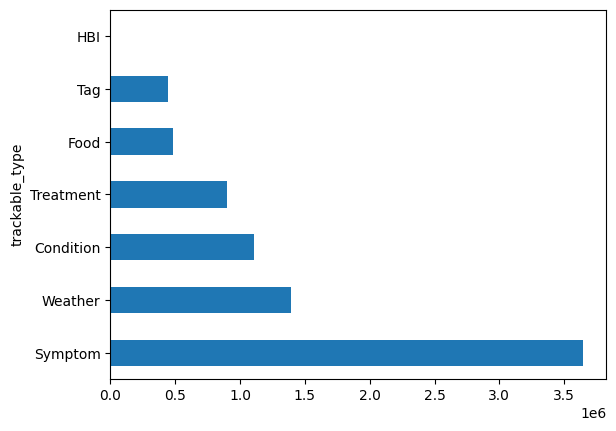

In [35]:
df.trackable_type.value_counts().plot(kind='barh')

In [36]:
# Descriptive statistics for age
df['age'].describe()


count    7.976223e+06
mean     3.506967e+01
std      1.409778e+02
min     -1.966910e+05
25%      2.700000e+01
50%      3.500000e+01
75%      4.200000e+01
max      2.018000e+03
Name: age, dtype: float64

In [37]:
# Number of check-ins by condition and country
df.groupby(['country', 'trackable_name']).size().unstack().fillna(0)


trackable_name,Reflux,jbjbbbv,1 150 mls apple juice,1 cup options white drank 2 mouthfuls,1 hour sleep,1 kids yogurt,1 plaain biscuit,1/2 boiled egg,1/2 mountain dew,2 fish fingers been sick with them,...,🚀,🥑,🥑 🍝 🍅 🦃,🥕,🥚 farm eggs,🥝,🥦,🦃,🧀,🧀
country,,,,,,,,,,,,,,,,,,,,,
AD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='checkin_year,checkin_month'>

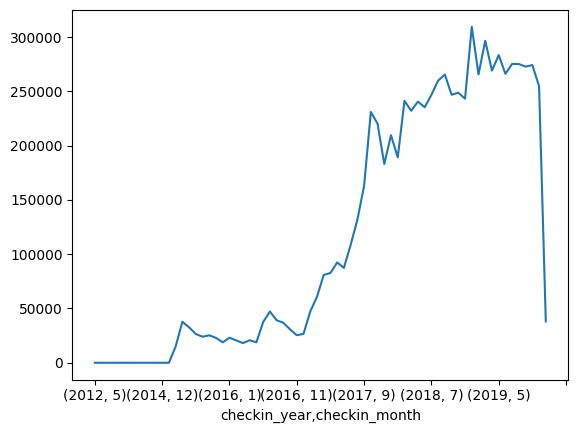

In [38]:
# Check-in trends over the years
df.groupby(['checkin_year', 'checkin_month']).size().plot(kind='line')


In [39]:
# Distribution of conditions by gender and age
df.pivot_table(index='trackable_name', columns='sex', values='age', aggfunc='mean')


sex,doesnt_say,female,male,other
trackable_name,,,,
Reflux,NaN,58.0,NaN,NaN
jbjbbbv,NaN,50.0,NaN,NaN
1 150 mls apple juice,NaN,49.0,NaN,NaN
1 cup options white drank 2 mouthfuls,NaN,49.0,NaN,NaN
1 hour sleep,NaN,49.0,NaN,NaN
...,...,...,...,...
🥝,25.0,NaN,NaN,NaN
🥦,25.0,NaN,NaN,NaN
🦃,NaN,30.0,NaN,NaN


In [40]:
# Number of check-ins by country
df['country'].value_counts()


country
US    4988194
GB    1230187
AU     516700
CA     497781
DE     122995
       ...   
LY          2
MV          1
OM          1
LR          1
IQ          1
Name: count, Length: 164, dtype: int64

Qualitative Research (Text-Based Analysis)

In [42]:
df['trackable_name'] = df['trackable_name'].astype(str)


Text Analysis (Word Frequency):

Perform a word frequency analysis to see which symptoms or conditions are most frequently reported. This will help  understand which conditions are most common.

In [43]:
# Tokenizing the text in 'trackable_name'
from collections import Counter
words = ' '.join(df['trackable_name']).lower().split()
word_freq = Counter(words)
print(word_freq.most_common(10))


[('pain', 896899), ('pressure', 252977), ('fatigue', 252619), ('humidity', 232512), ('icon', 232301), ('temperature_min', 232301), ('temperature_max', 232301), ('precip_intensity', 232301), ('anxiety', 137469), ('headache', 133631)]


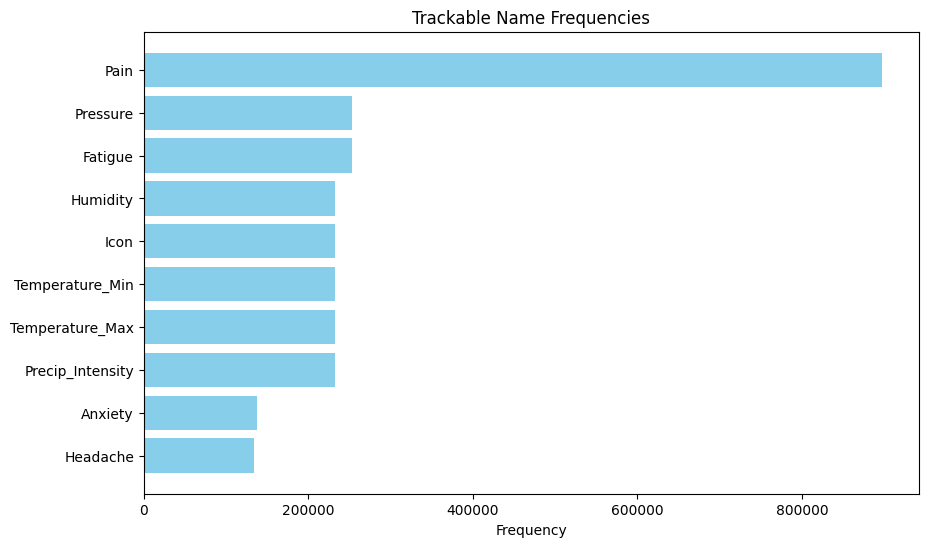

In [45]:
import matplotlib.pyplot as plt

# Data
trackable_names = ['Pain', 'Pressure', 'Fatigue', 'Humidity', 'Icon', 'Temperature_Min', 'Temperature_Max', 'Precip_Intensity', 'Anxiety', 'Headache']
frequency = [896899, 252977, 252619, 232512, 232301, 232301, 232301, 232301, 137469, 133631]

plt.figure(figsize=(10, 6))
plt.barh(trackable_names, frequency, color='skyblue')
plt.xlabel('Frequency')
plt.title('Trackable Name Frequencies')
plt.gca().invert_yaxis() # To display the highest frequency at the top
plt.show()


In [54]:
# Drop the 'trackable_value' column
df = df.drop(columns=['trackable_value'])

# Preview the updated DataFrame
df.head(10)


,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,checkin_year,checkin_month,checkin_day,checkin_month_name,tag
0,9070,35.069666,female,US,2015-11-26,1069,Condition,Ulcerative colitis,2015,11,26,Nov,Ulcerative colitis
1,22737,32.000000,male,US,2015-11-26,1069,Condition,Ulcerative colitis,2015,11,26,Nov,Ulcerative colitis
2,376,2.000000,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,2017,4,28,Apr,pain in left upper arm felt like i was getting...
3,376,2.000000,female,CA,2017-04-28,3169,Condition,hip pain when gettin up,2017,4,28,Apr,hip pain when gettin up
4,376,2.000000,female,CA,2017-04-28,3170,Condition,pain in hand joints,2017,4,28,Apr,pain in hand joints
5,376,2.000000,female,CA,2017-04-28,3171,Condition,numbness in right hand,2017,4,28,Apr,numbness in right hand
6,376,2.000000,female,CA,2017-04-28,1356,Condition,Headache,2017,4,28,Apr,Headache
7,376,2.000000,female,CA,2017-04-28,3172,Condition,pain in left ankle,2017,4,28,Apr,pain in left ankle
8,376,2.000000,female,CA,2017-04-28,3173,Condition,pain in left leg,2017,4,28,Apr,pain in left leg
9,376,2.000000,female,CA,2017-04-28,3174,Condition,pain in joints on feet,2017,4,28,Apr,pain in joints on feet


In [58]:
df.shape

(7976223, 13)

In [59]:
# Export to CSV for Power BI
df.to_csv('flaredown_cleaned_data.csv', index=False)


In [60]:
df.columns

Index(['user_id', 'age', 'sex', 'country', 'checkin_date', 'trackable_id',
       'trackable_type', 'trackable_name', 'checkin_year', 'checkin_month',
       'checkin_day', 'checkin_month_name', 'tag'],
      dtype='object')

<bound method DataFrame.info of          user_id        age     sex country checkin_date trackable_id  \
0           9070  35.069666  female      US   2015-11-26         1069   
1          22737  32.000000    male      US   2015-11-26         1069   
2            376   2.000000  female      CA   2017-04-28         3168   
3            376   2.000000  female      CA   2017-04-28         3169   
4            376   2.000000  female      CA   2017-04-28         3170   
...          ...        ...     ...     ...          ...          ...   
7976218    38270  22.000000  female      GB   2019-12-04            1   
7976219    38270  22.000000  female      GB   2019-12-04            2   
7976220    38270  22.000000  female      GB   2019-12-04         9002   
7976221    38270  22.000000  female      GB   2019-12-04         9139   
7976222    38270  22.000000  female      GB   2019-12-04        10260   

        trackable_type                                     trackable_name  \
0            C

In [63]:
df['country'].unique

<bound method Series.unique of 0          US
1          US
2          CA
3          CA
4          CA
           ..
7976218    GB
7976219    GB
7976220    GB
7976221    GB
7976222    GB
Name: country, Length: 7976223, dtype: object>

In [64]:
# Remove rows with any blank values
df = df.dropna()


In [65]:
df.shape

(7976223, 13)